In [413]:
import pandas as pd
import numpy as np

# Loading datasets
cab_data = pd.read_csv('C:/Users/previ/OneDrive/Documents/Cab_Data.csv')
customer_data = pd.read_csv('C:/Users/previ/OneDrive/Documents/Customer_ID.csv')
transaction_data = pd.read_csv('C:/Users/previ/OneDrive/Documents/Transaction_ID.csv')
city_data = pd.read_csv('C:/Users/previ/OneDrive/Documents/City.csv')

The necessary library is imported and the 4 different data sets are loaded

In [415]:
# Displaying first few rows of each dataset
print(cab_data.head())
print(customer_data.head())
print(transaction_data.head())
print(city_data.head())


   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290       

In [418]:
#viewing the size of the datasets
print(cab_data.shape)
print(customer_data.shape)
print(transaction_data.shape)
print(city_data.shape)

(359392, 7)
(49171, 4)
(440098, 3)
(20, 3)


In [419]:
# Getting the summary statistics
print(cab_data.describe())
print(customer_data.describe())
print(transaction_data.describe())
print(city_data.describe())


       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000  
        Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        1501

In [422]:
#merging the datasets
merged_data = pd.merge(cab_data, transaction_data, on='Transaction ID')
merged_data = pd.merge(merged_data, customer_data, on='Customer ID')
merged_data = pd.merge(merged_data, city_data, on='City')

The different datasets are merged using common variables to produce a single dataset.
cab_data is merged with transaction_data using the common variable 'Transaction ID' in the 2 datasets.
The merged data is then combined with the Customer_data using the common variable 'Customer ID'.
The merged data gotten from the previus merges is then combined with the city_data using the common variable 'City'.

In [435]:
#viewing the merged data
merged_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"


In [436]:
# Finding the shape of the merged data
print(merged_data.shape)

(359392, 14)


In [425]:
# changing the Date of Travel to date time format and adding the new column to the merged_data
datelist = cab_data["Date of Travel"].to_list()
base_date = pd.Timestamp('1899-12-29')
datelist2 = [base_date + pd.DateOffset(date_offset) for date_offset in datelist]
cab_data["Date of Travel"] = pd.to_datetime(datelist2, format = '%d/%m/%y')

In [437]:
# Calculating profit margin and adding the new column to the dataset
cab_data['profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

In [438]:

cab_data.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


In [439]:
# Joining datasets
final_data = pd.merge(cab_data, transaction_data, on='Transaction ID')
final_data = pd.merge(final_data, customer_data, on='Customer ID')
final_data = pd.merge(final_data, city_data, on='City')

In [440]:
#checking for missing values
final_data.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
profit                0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [441]:
# creating a new column 'Age Group' by grouping the age

# firstly define the bins and corresponding labels
# 18-29: Young, 30-44: Middle Age, 45-65: Elderly
bins = [18, 30, 45, 66]  
labels = ['Young', 'Middle Age', 'Elderly']

# Creating a new column 'Age Group' in the final_data DataFrame
final_data['Age Group'] = pd.cut(final_data['Age'], bins=bins, labels=labels, right=False)

# Displaying the first few rows to check the new column
print(final_data[['Age', 'Age Group']].head())


# Checking for missing values again
missing_values = final_data['Age Group'].isnull().sum()
print(f'Missing values in Age Group: {missing_values}')

   Age Age Group
0   28     Young
1   28     Young
2   28     Young
3   27     Young
4   27     Young
Missing values in Age Group: 0


In [443]:
# creating a new column 'Income Group' by grouping the income

# firstly the bins and corresponding labels for income are defined
# 2000-9999: Low, 10000-19999: Medium, 20000-35000: High
income_bins = [2000, 10000, 20000, 36000]  
income_labels = ['Low', 'Medium', 'High']

# Creating a new column 'Income Group' in the final_data DataFrame
final_data['Income Group'] = pd.cut(final_data['Income (USD/Month)'], bins=income_bins, labels=income_labels, right=False)

# Displaying the first few rows to check the new column
print(final_data[['Income (USD/Month)', 'Income Group']].head())

   Income (USD/Month) Income Group
0               10813       Medium
1               10813       Medium
2               10813       Medium
3                9237          Low
4                9237          Low


In [444]:
# Creating a new column 'Travel Month' by extracting the month name from 'Date of Travel'

final_data['Travel Month'] = final_data['Date of Travel'].dt.strftime('%B')

# Displaying the first few rows to check the new column
print(final_data[['Date of Travel', 'Travel Month']].head())

  Date of Travel Travel Month
0     2016-01-07      January
1     2018-07-20         July
2     2018-11-22     November
3     2016-01-05      January
4     2018-04-20        April


In [445]:
# Extract the year from the 'Date of Travel' column and creating a new column 'Year' 
final_data['Year'] = final_data['Date of Travel'].dt.year


In [446]:
# Create a new column for Price per Kilometer
final_data['Price per KM'] = final_data['Price Charged'] / final_data['KM Travelled']


In [447]:
#viewing the final data
final_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Age Group,Income Group,Travel Month,Year,Price per KM
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,"814,885","24,701",Young,Medium,January,2016,12.182266
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813,"814,885","24,701",Young,Medium,July,2018,22.859870
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813,"814,885","24,701",Young,Medium,November,2018,18.614571
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,"814,885","24,701",Young,Low,January,2016,12.526904
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,27703,Card,Male,27,9237,"814,885","24,701",Young,Low,April,2018,19.821330


In [448]:
final_data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Age Group,Income Group,Travel Month,Year,Price per KM
359387,10307228,2018-03-02,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,143.6180,51406,Cash,Female,29,6829,"418,859","127,001",Young,Low,March,2018,17.420052
359388,10319775,2018-04-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,23.0464,51406,Cash,Female,29,6829,"418,859","127,001",Young,Low,April,2018,18.935574
359389,10347676,2018-07-05,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,-5.8540,51406,Card,Female,29,6829,"418,859","127,001",Young,Low,July,2018,14.150469
359390,10358624,2018-08-01,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,-6.0900,51406,Cash,Female,29,6829,"418,859","127,001",Young,Low,August,2018,12.979348
359391,10370709,2018-08-29,Yellow Cab,WASHINGTON DC,34.24,453.11,427.3152,25.7948,51406,Card,Female,29,6829,"418,859","127,001",Young,Low,August,2018,13.233353


In [449]:
#checking the size of the dataset
print(final_data.shape)

(359392, 20)


In [450]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   profit              359392 non-null  float64       
 8   Customer ID         359392 non-null  int64         
 9   Payment_Mode        359392 non-null  object        
 10  Gender              359392 non-null  object        
 11  Age                 359392 non-null  int64         
 12  Income (USD/Month)  359392 non-null  int64         
 13  Population          359392 no

In [451]:
#checking for missing values
final_data.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
profit                0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Age Group             0
Income Group          0
Travel Month          0
Year                  0
Price per KM          0
dtype: int64

There are no missing values in the dataset

In [452]:
#importing libraries for visualising
import seaborn as sns
import matplotlib.pyplot as plt

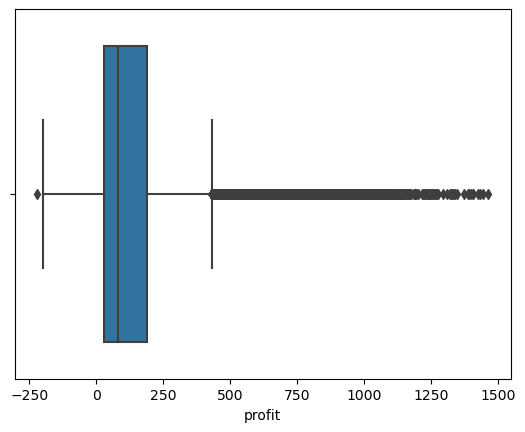

In [453]:
# Outlier detection using boxplot
sns.boxplot(x=final_data['profit'])
plt.show()

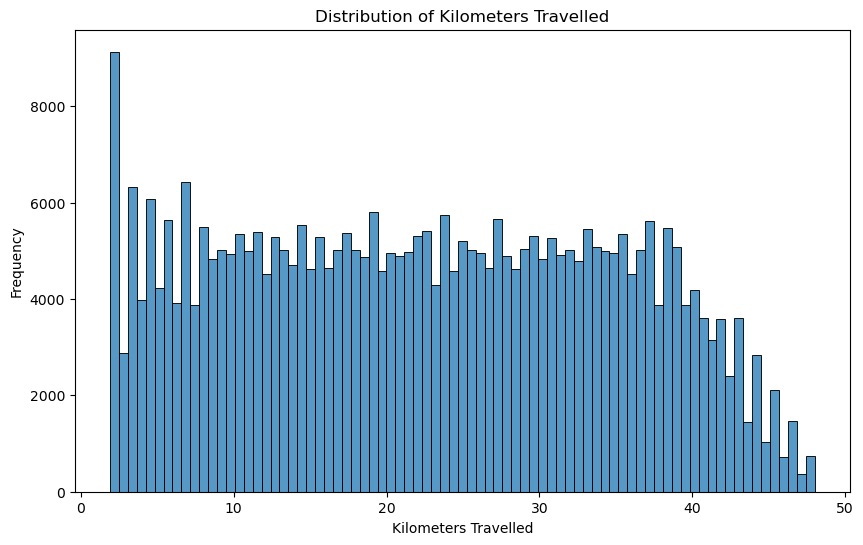

In [371]:
plt.figure(figsize=(10, 6))
sns.histplot(final_data['KM Travelled'])
plt.title('Distribution of Kilometers Travelled')
plt.xlabel('Kilometers Travelled')
plt.ylabel('Frequency')
plt.show()

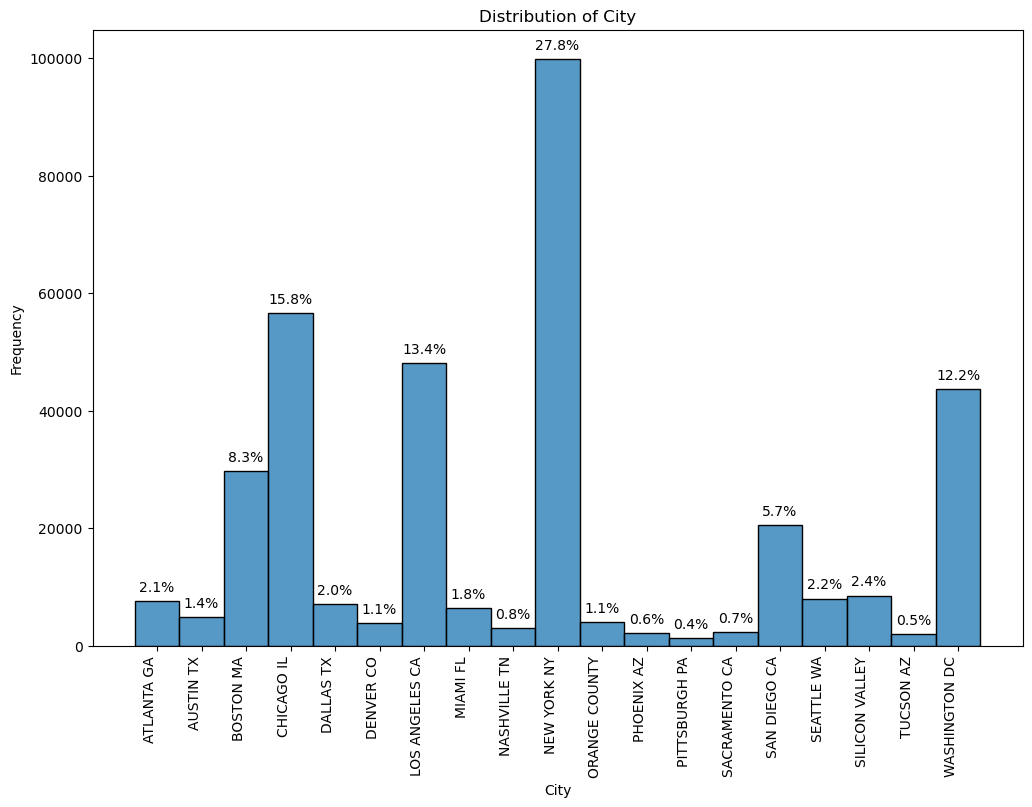

In [454]:
# Creating a histogram of City
plt.figure(figsize=(12, 8))  # Increase the figure size to accommodate more city labels
ax = sns.histplot(final_data['City'])

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90, fontsize=10, ha='right')

# Calculating the percentage for each bar
for p in ax.patches:
    height = p.get_height()
    total = len(final_data['City'])
    percentage = f'{(height/total)*100:.1f}%'
    
    # Annotate the bars with the percentage value
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Distribution of City')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show()


In [ ]:
Newyork city has the highest number of users

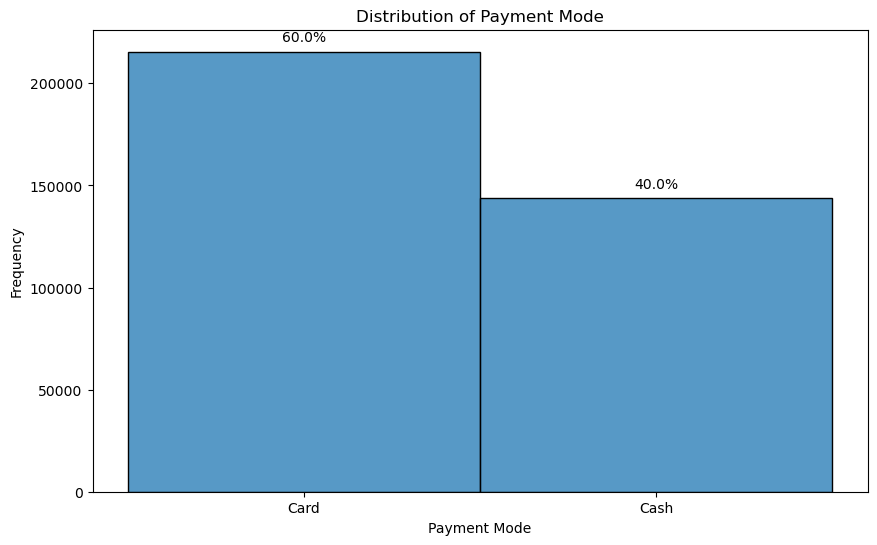

In [456]:
# Histogram for payment mode
plt.figure(figsize=(10, 6))
ax = sns.histplot(final_data['Payment_Mode'])

# Calculating the percentage for each bar
for p in ax.patches:
    height = p.get_height()
    total = len(final_data['Payment_Mode'])
    percentage = f'{(height/total)*100:.1f}%'
    
    # Annotate the bars with the percentage value
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Distribution of Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Frequency')
plt.show()

60% of the users paid by card while 40% paid cash

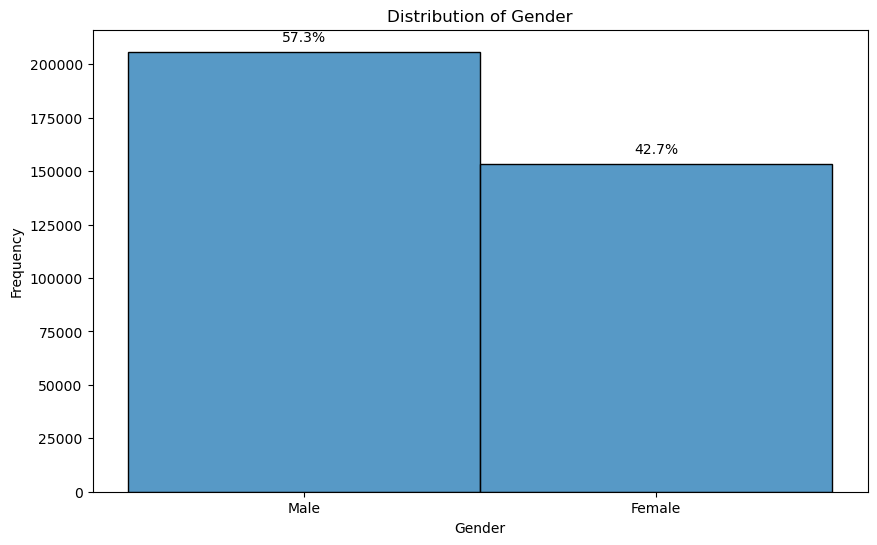

In [457]:
# Histogram for Gender
plt.figure(figsize=(10, 6))
ax = sns.histplot(final_data['Gender'])

# Calculate the percentage for each bar
for p in ax.patches:
    height = p.get_height()
    total = len(final_data['Gender'])
    percentage = f'{(height/total)*100:.1f}%'
    
    # Annotate the bars with the percentage value
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

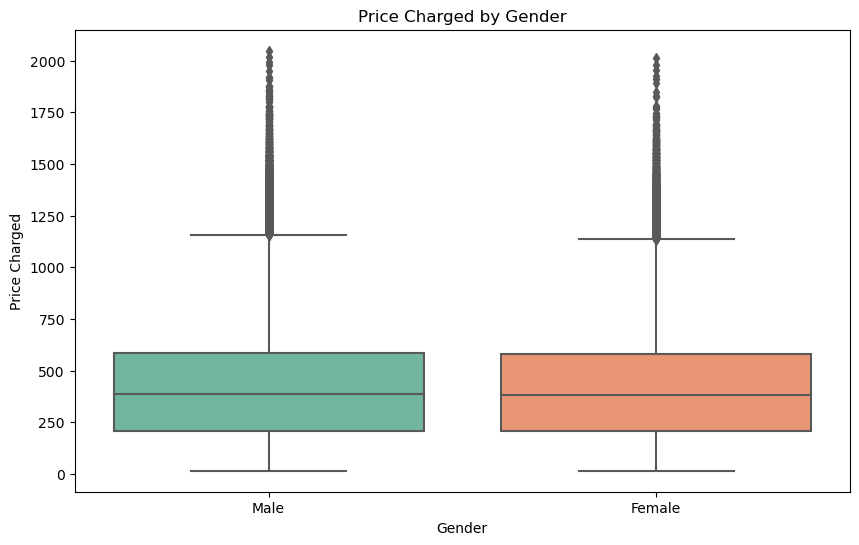

In [488]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Price Charged', data=final_data, palette='Set2')
plt.title('Price Charged by Gender')
plt.xlabel('Gender')
plt.ylabel('Price Charged')
plt.show()

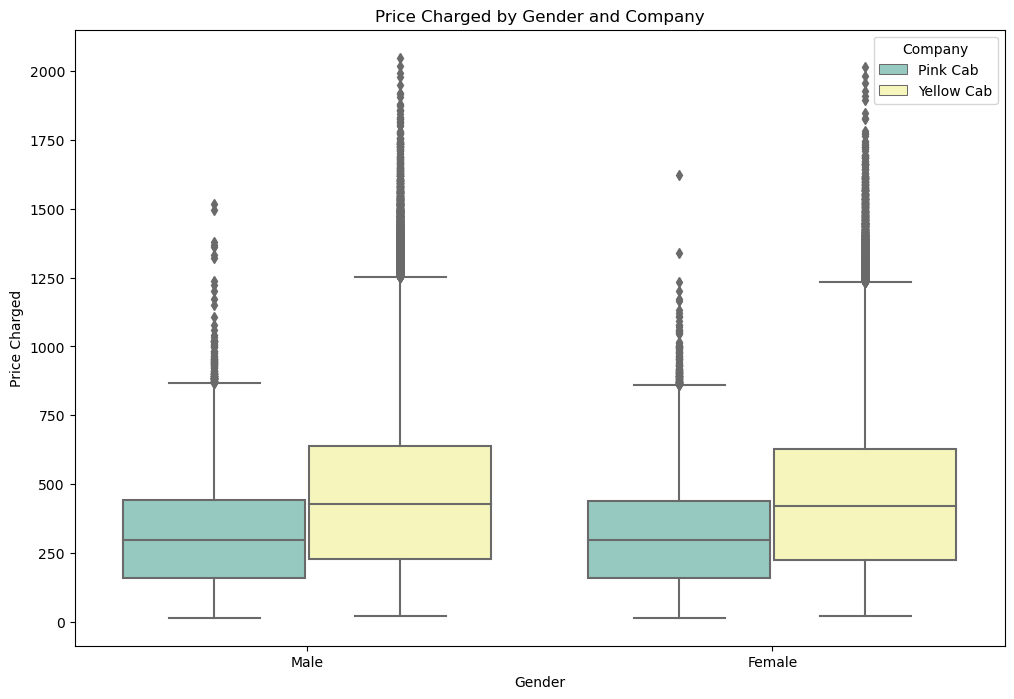

In [489]:
# plotting gender against price charged in comparison with the different companys 
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='Price Charged', hue='Company', data=final_data, palette='Set3')
plt.title('Price Charged by Gender and Company')
plt.xlabel('Gender')
plt.ylabel('Price Charged')
plt.legend(title='Company')
plt.show()

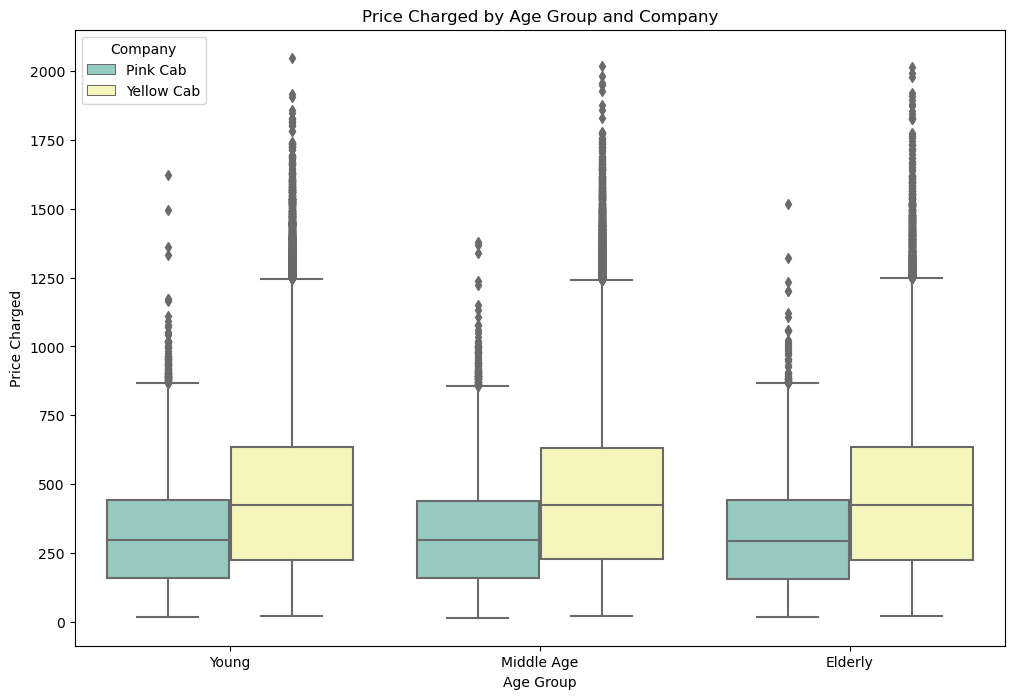

In [492]:
# plotting Age group against price charged in comparison with the different companys 
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age Group', y='Price Charged', hue='Company', data=final_data, palette='Set3')
plt.title('Price Charged by Age Group and Company')
plt.xlabel('Age Group')
plt.ylabel('Price Charged')
plt.legend(title='Company')
plt.show()

Price is charged uniformly regardless of Age group or Gender

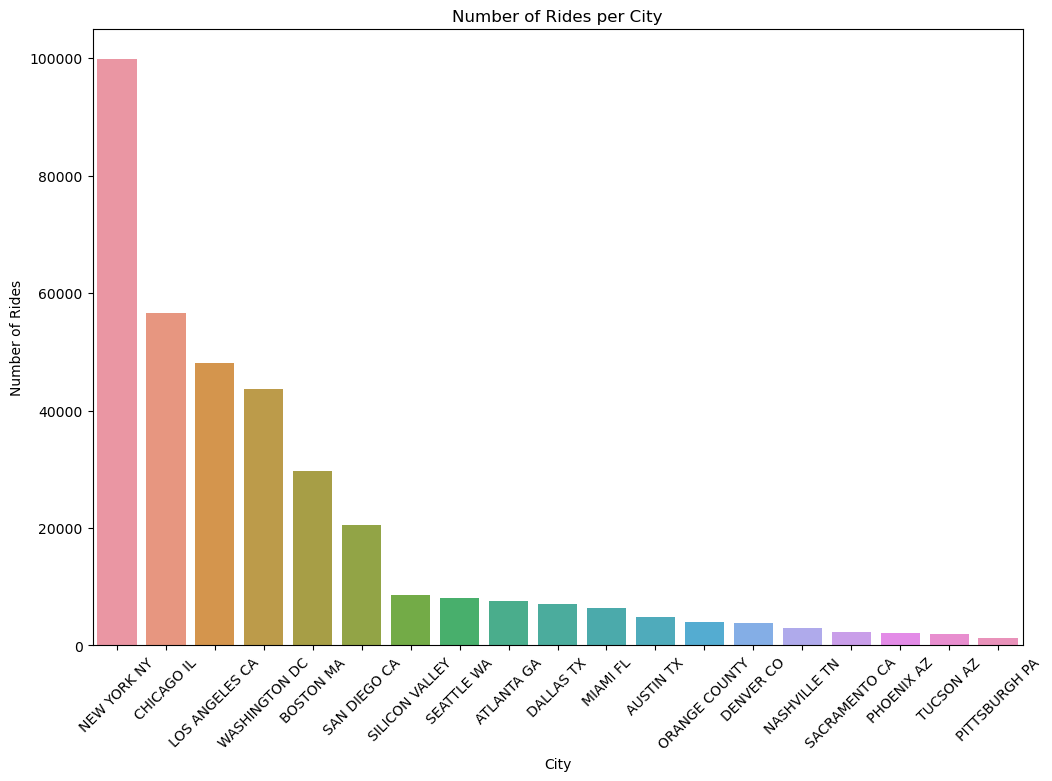

In [460]:
plt.figure(figsize=(12, 8))
sns.countplot(x='City', data=final_data, order=final_data['City'].value_counts().index)
plt.title('Number of Rides per City')
plt.xlabel('City')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

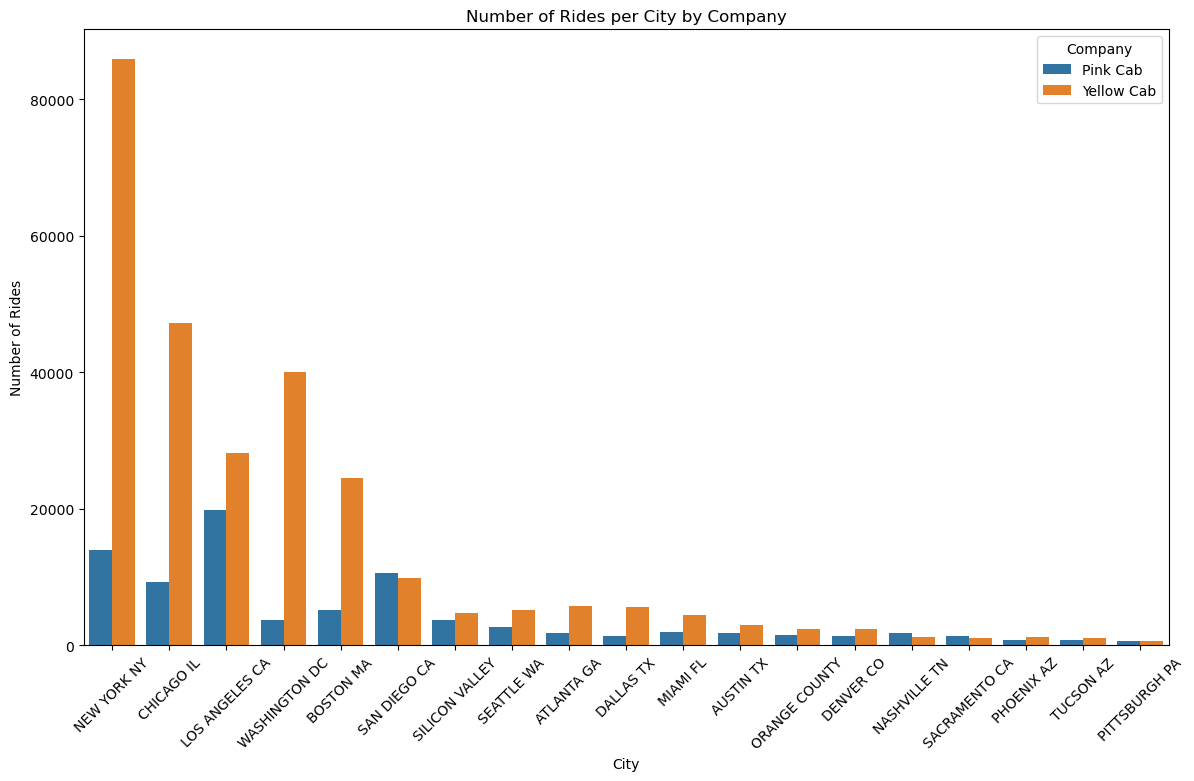

In [461]:
plt.figure(figsize=(14, 8))
sns.countplot(x='City', hue='Company', data=final_data, order=final_data['City'].value_counts().index)
plt.title('Number of Rides per City by Company')
plt.xlabel('City')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

New york city had the highest number of riders followed by chicago while Pittsburgh PA had the least number of riders.
All other cities had more riders from yellow cab compared to pink cab. Cities like San Diego CA, Nashville TN, Sacamento CA and Pittsburgh PA had slightly more riders from Pink cab

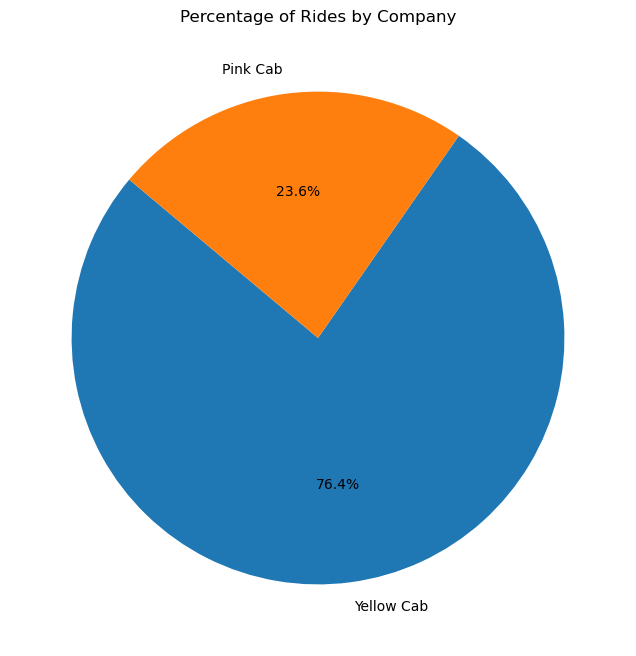

In [462]:
# Pie chart for Percentage of Rides by Company
Company_counts = final_data['Company'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Company_counts, labels=Company_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Rides by Company')
plt.show()

Yellow cab is a more porpular option than pink cab

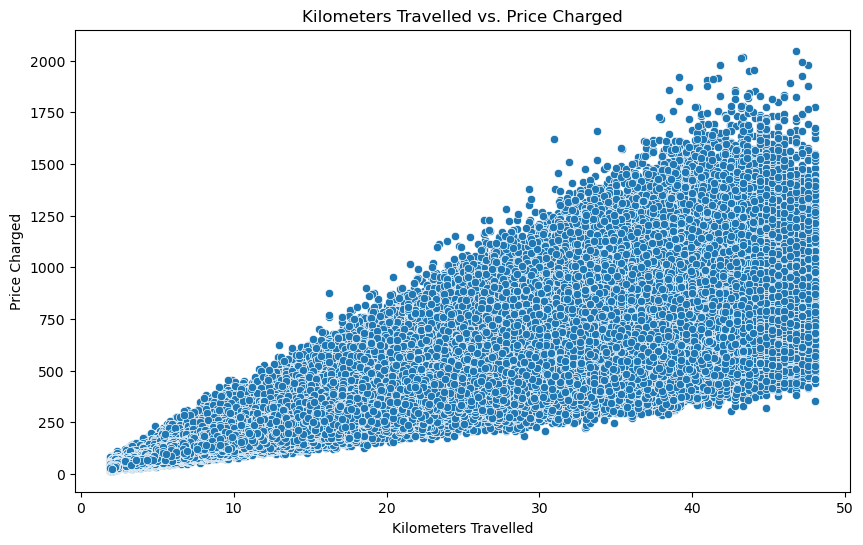

In [463]:
# Scatter plot for Kilometers Travelled vs. Price Charged
plt.figure(figsize=(10, 6))
sns.scatterplot(x='KM Travelled', y='Price Charged', data=final_data)
plt.title('Kilometers Travelled vs. Price Charged')
plt.xlabel('Kilometers Travelled')
plt.ylabel('Price Charged')
plt.show()

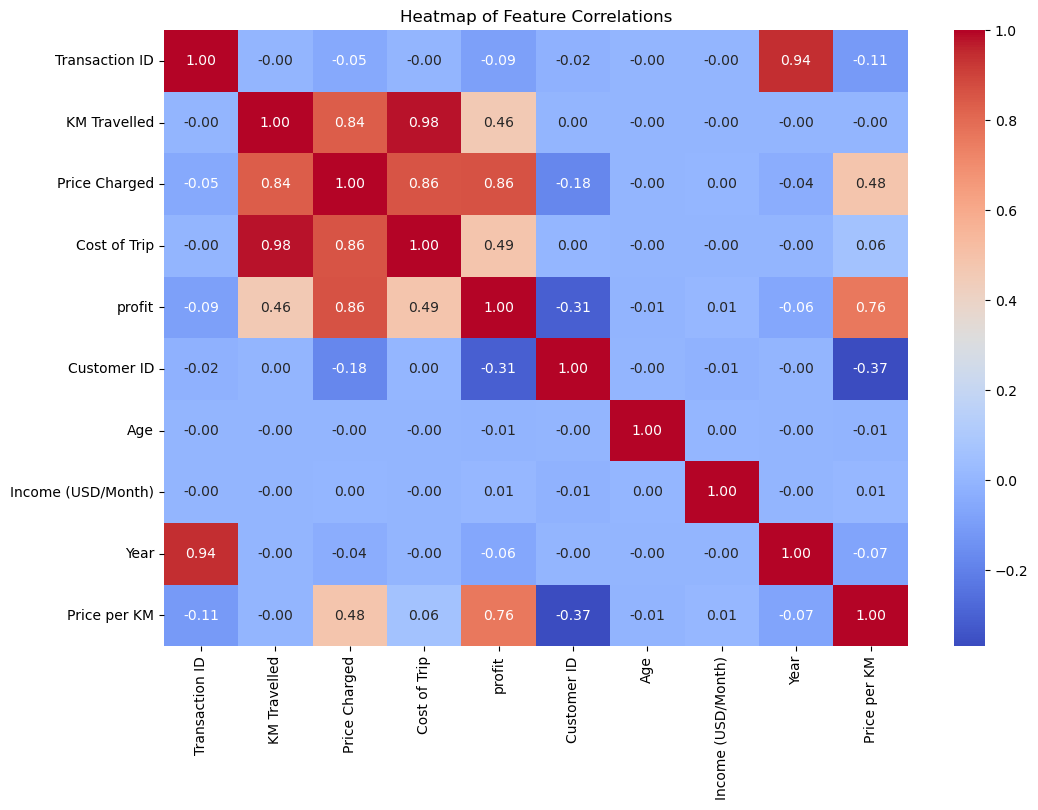

In [464]:
#Using heatmap to understand the correlation betweeen the numeric variables 

# Selecting only the numeric columns from the DataFrame
numeric_data = final_data.select_dtypes(include=[np.number])

#calculating the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

There is a high positive correlation between the kilometer travelled and the cost of trip, profit and price charged, kilometer travelled and price charged.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


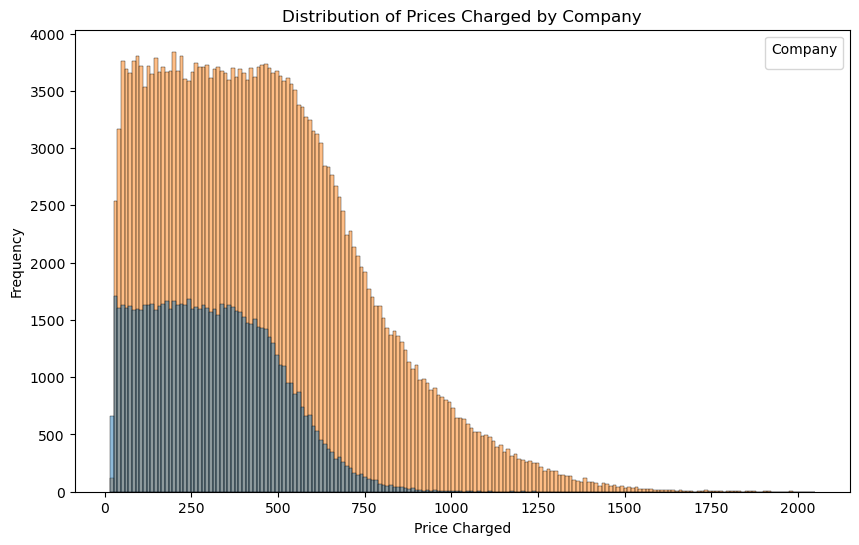

In [465]:
#price charged by company
plt.figure(figsize=(10, 6))
sns.histplot(data=final_data, x='Price Charged', hue='Company')
plt.title('Distribution of Prices Charged by Company')
plt.xlabel('Price Charged')
plt.ylabel('Frequency')
plt.legend(title='Company')
plt.show()

C:\Users\previ\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\previ\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


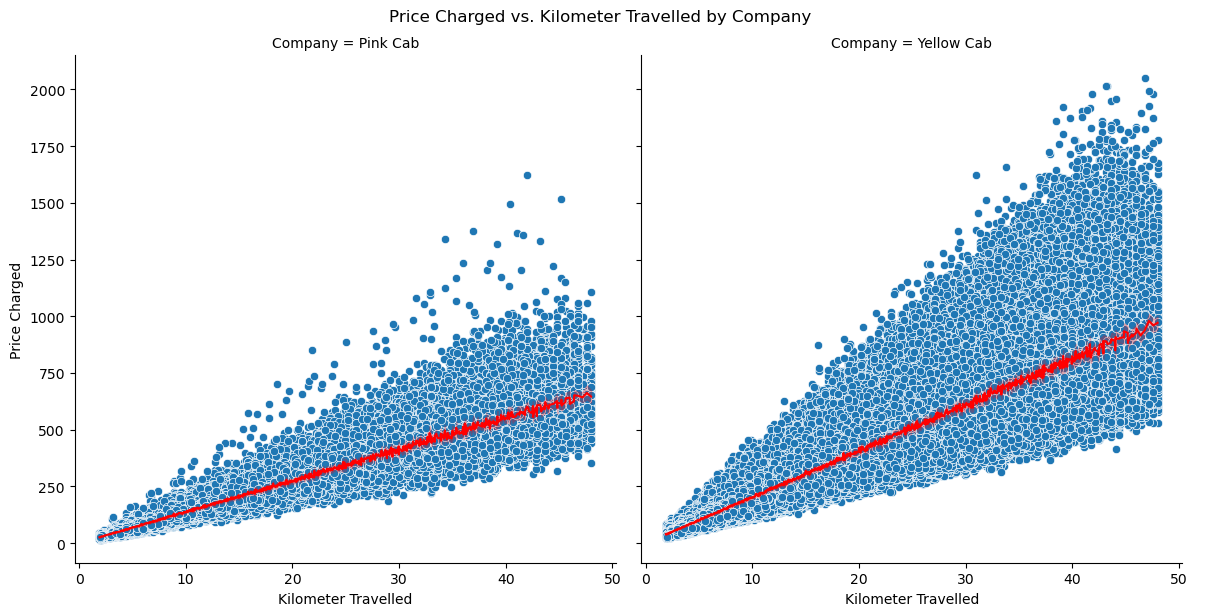

In [466]:
g = sns.FacetGrid(final_data, col='Company', height=6)
g.map(sns.scatterplot, 'KM Travelled', 'Price Charged')
g.map(sns.lineplot, 'KM Travelled', 'Price Charged', color='red')
g.add_legend()
g.set_axis_labels('Kilometer Travelled', 'Price Charged')
g.fig.suptitle('Price Charged vs. Kilometer Travelled by Company', y=1.02)
plt.show()

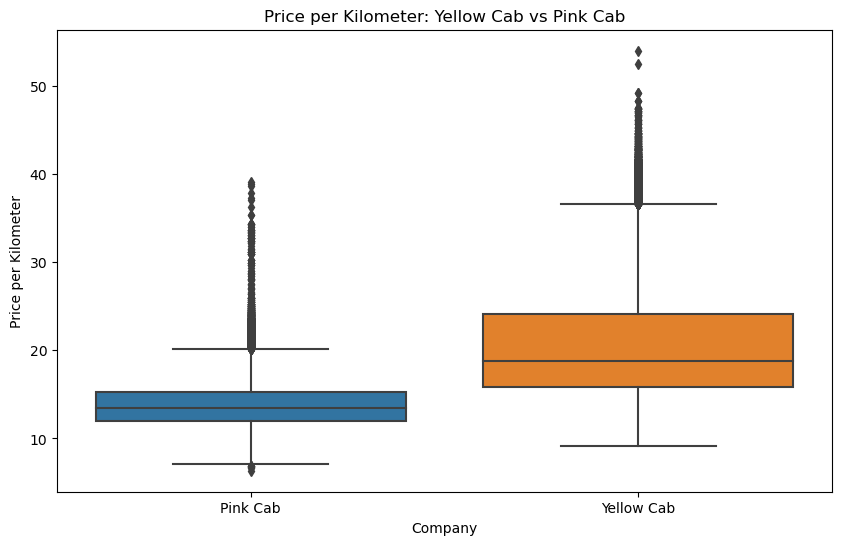

In [467]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Company', y='Price per KM', data=final_data)
plt.title('Price per Kilometer: Yellow Cab vs Pink Cab')
plt.xlabel('Company')
plt.ylabel('Price per Kilometer')
plt.show()

.The distance travelled is a determinat of price charged.
.The scatter plot with regression line shows that yellow cab charges higher than pink cab per distance travelled. The box plot also confirms this. As the median of the yellow cab is higher than that of the pink cab

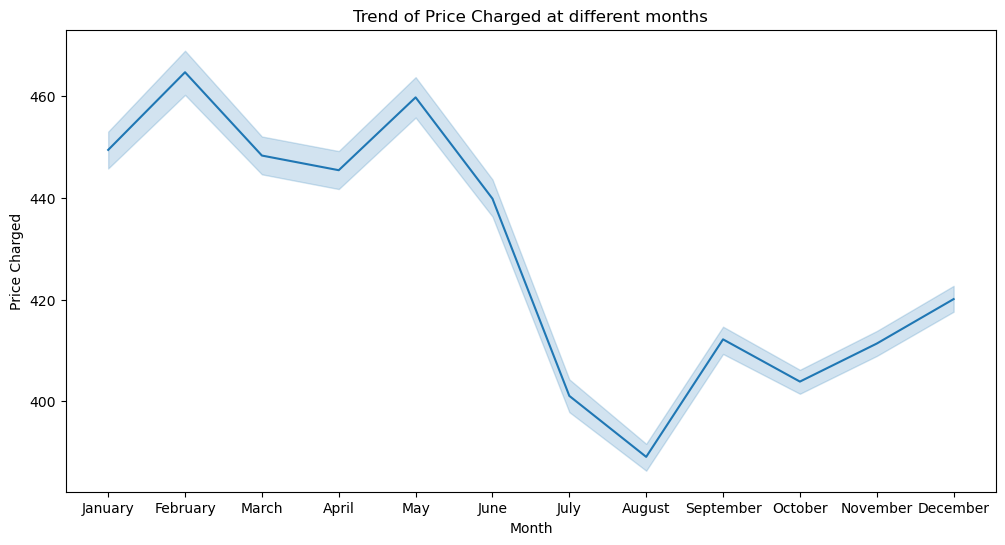

In [468]:
# Convert 'Travel Month' to a categorical variable with the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_data['Travel Month'] = pd.Categorical(final_data['Travel Month'], categories=month_order, ordered=True)

# Line plot for Price Charged Over Time with months in ascending order
plt.figure(figsize=(12, 6))
sns.lineplot(x='Travel Month', y='Price Charged', data=final_data)
plt.title('Trend of Price Charged at different months')
plt.xlabel('Month')
plt.ylabel('Price Charged')
plt.show()

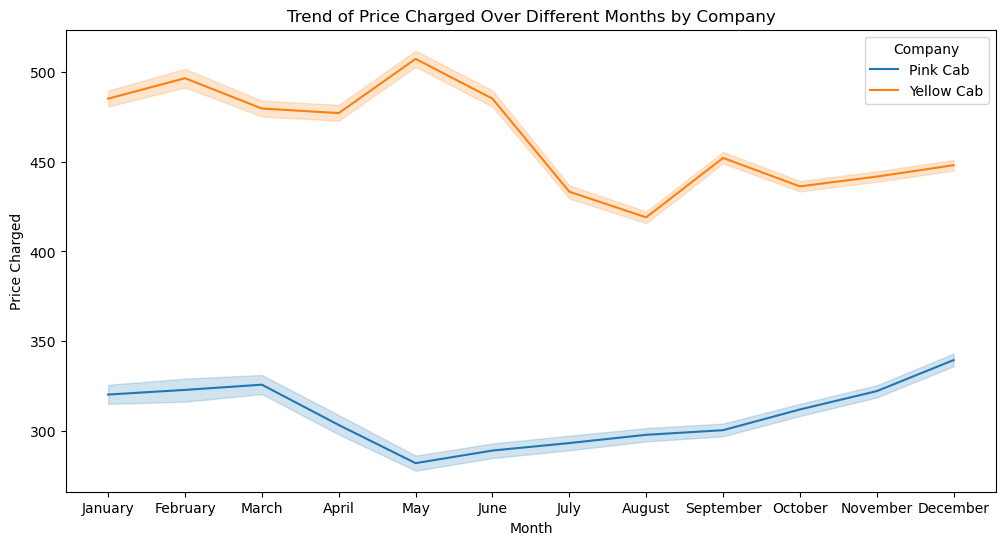

In [311]:
# Convert 'Travel Month' to a categorical variable with the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_data['Travel Month'] = pd.Categorical(final_data['Travel Month'], categories=month_order, ordered=True)

# Line plot for Price Charged Over Time by Company
plt.figure(figsize=(12, 6))
sns.lineplot(x='Travel Month', y='Price Charged', hue='Company', data=final_data)
plt.title('Trend of Price Charged Over Different Months by Company')
plt.xlabel('Month')
plt.ylabel('Price Charged')
plt.legend(title='Company')
plt.show()

in the month of May Yellow cab charged highest while Pink charged lowest

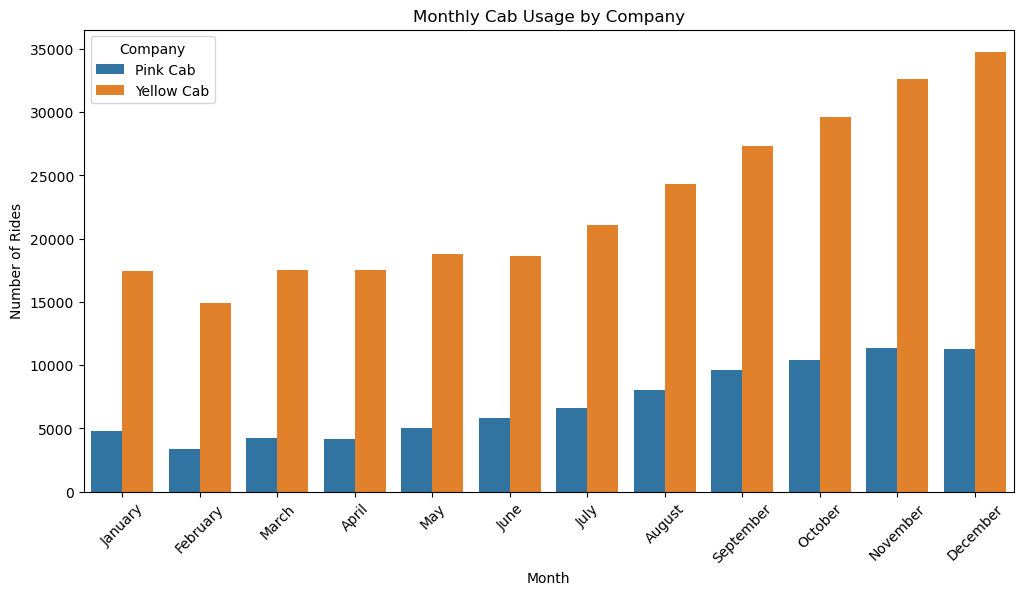

In [469]:
#monthly cab usage by company
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(12, 6))
sns.countplot(data=final_data, x='Travel Month', hue='Company')
plt.title('Monthly Cab Usage by Company')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()


There is a steady increase in Cab users from August to December

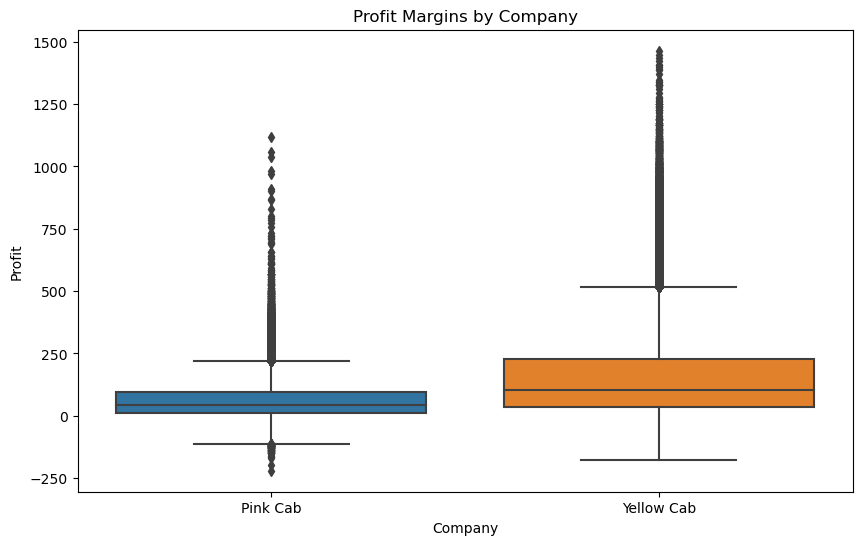

In [386]:
# profit margin by company
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_data, x='Company', y='profit')
plt.title('Profit Margins by Company')
plt.xlabel('Company')
plt.ylabel('Profit')
plt.show()

Yellow cab made more profit compared to pink cab

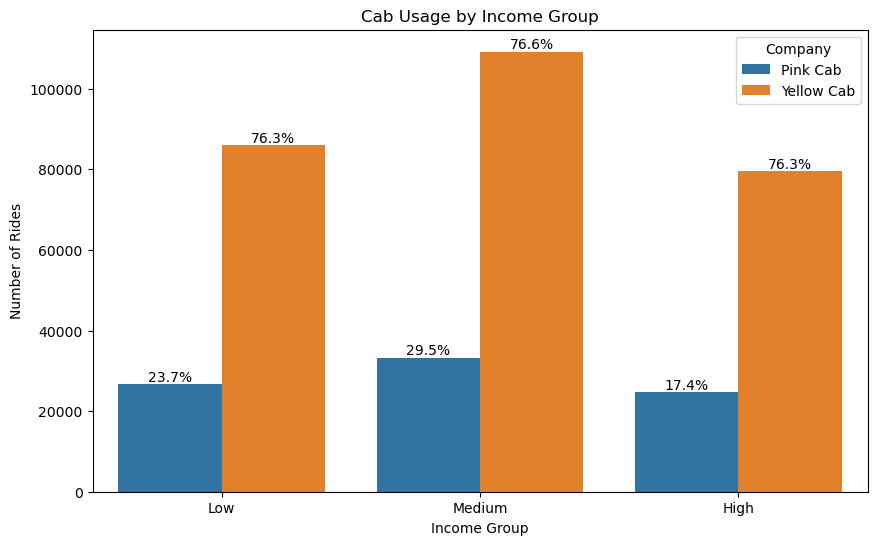

In [470]:
#income group versus cab usage
# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=final_data, x='Income Group', hue='Company')

# Calculate the percentages
total_counts = final_data['Income Group'].value_counts().sort_index()
for p in ax.patches:
    height = p.get_height()
    income_group = p.get_x() + p.get_width() / 2
    total = total_counts.iloc[int(income_group)]
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

# Add labels and title
plt.title('Cab Usage by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Number of Rides')
plt.legend(title='Company')
plt.show()

across the two companys most of their customers are medium earners followed by low income earners

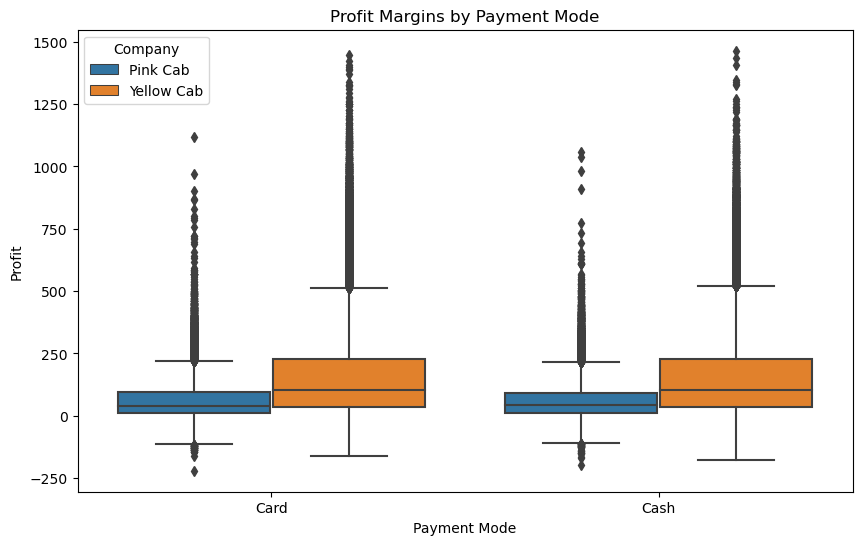

In [471]:
#payment mode by profit margin
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_data, x='Payment_Mode', y='profit', hue='Company')
plt.title('Profit Margins by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Profit')
plt.legend(title='Company')
plt.show()

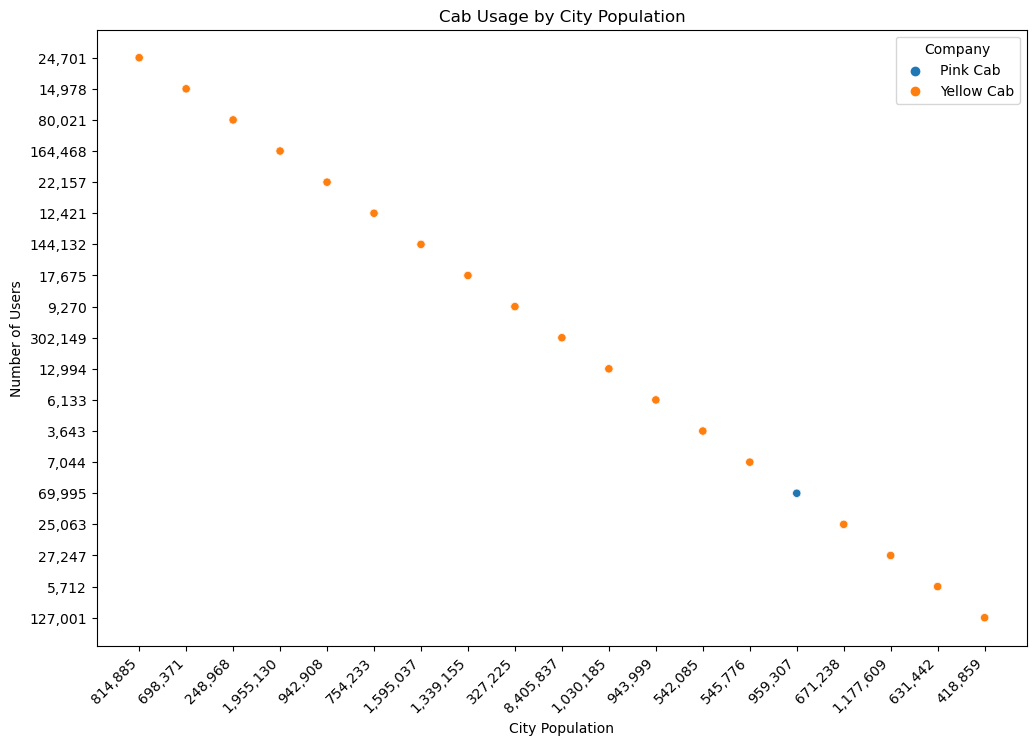

In [472]:
# Creating a scatter plot for City Population vs Users
plt.figure(figsize=(12, 8))  # Increase the figure size to accommodate more space for labels
sns.scatterplot(data=final_data, x='Population', y='Users', hue='Company')

# Rotating the x-axis labels for better visibility and adjust font size
plt.xticks(rotation=45, fontsize=10, ha='right')

# Adding labels and title
plt.title('Cab Usage by City Population')
plt.xlabel('City Population')
plt.ylabel('Number of Users')
plt.legend(title='Company')

# Display the plot
plt.show()

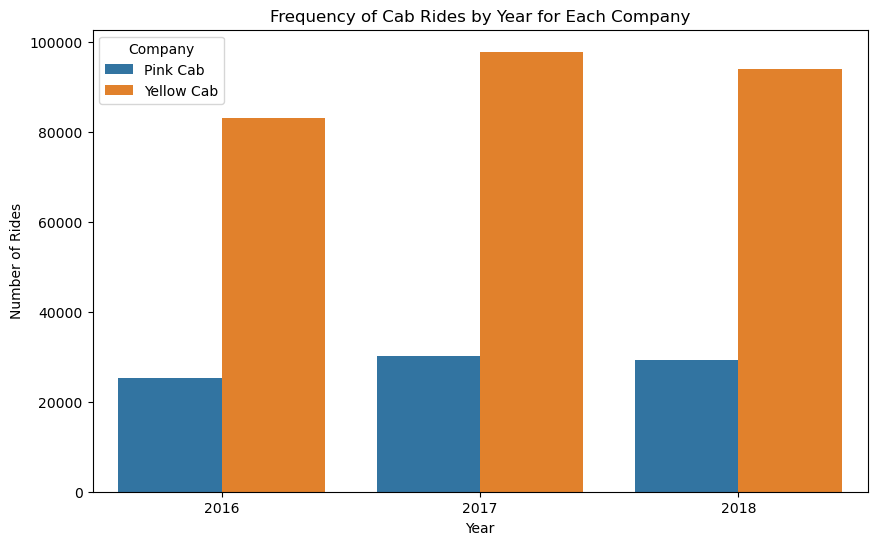

In [478]:
# Extract the year from the 'Date of Travel' column and create a new 'Year' column
final_data['Year'] = final_data['Date of Travel'].dt.year

# Create a countplot to visualize the frequency by year for the two companies
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=final_data, x='Year', hue='Company')

# Calculate the percentage for each bar and annotate
total_counts = final_data.groupby(['Year', 'Company']).size().unstack(fill_value=0)

for year in total_counts.index:
    for company in total_counts.columns:
        count = total_counts.loc[year, company]
        total = total_counts.loc[year].sum()
        percentage = f'{(count / total) * 100:.1f}%'
        
        # Find the bar corresponding to this year and company
        for p in ax.patches:
            if int(p.get_x() + p.get_width() / 2.0) == year and p.get_height() == count:
                ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                            textcoords='offset points')
                break

# Add title and labels
plt.title('Frequency of Cab Rides by Year for Each Company')
plt.xlabel('Year')
plt.ylabel('Number of Rides')
plt.legend(title='Company')

# Show the plot
plt.show()

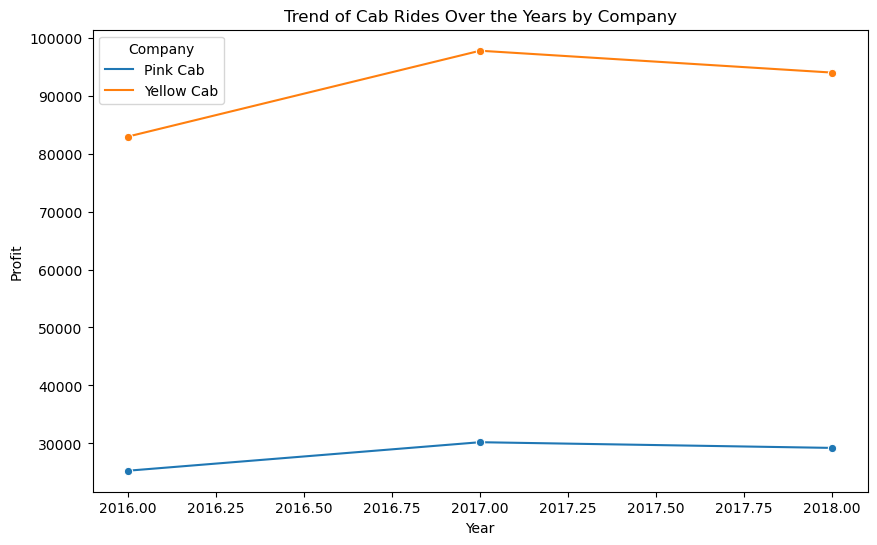

In [473]:
# Group the data by Year and Company, and count the number of rides
yearly_data = final_data.groupby(['Year', 'Company']).size().reset_index(name='Profit')

# Create a line plot to show the trend over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_data, x='Year', y='Profit', hue='Company', marker='o')
plt.title('Trend of Cab Rides Over the Years by Company')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.legend(title='Company')
plt.show()

Yellow cab and Pink Cab experienced a sharp increase in profit from 2016 to 2017 and a slight decreaase from 2017 to 2018.

###### HYPOTHESIS TESTING

In [484]:
#HYPOTHESIS 1 Is there seasonality in the number of customers using the cab service?
from scipy.stats import chi2_contingency

#Seasonality Analysis

from scipy.stats import chi2_contingency

monthly_usage = final_data.groupby('Travel Month')['Transaction ID'].count().reset_index()


# Creating a contingency table
contingency_table = pd.crosstab(final_data['Travel Month'], final_data['Company'])

# Running Chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Print the p-value
print(f'Seasonality Analysis: P-value for seasonality in cab usage: {p_value:.4f}')


# Check p-value
if p < 0.05:
    print("Reject the null hypothesis: Significant seasonal effect on cab usage.")
else:
    print("Fail to reject the null hypothesis: No significant seasonal effect on cab usage.")
    
    print('P value is ', p_value)


Seasonality Analysis: P-value for seasonality in cab usage: 0.4454
Reject the null hypothesis: Significant seasonal effect on cab usage.


Chi-square test for independence is done to check if cab usage is independent of the month. The null hypothesis states that there is no difference in cab usage across each month. Since the p value is less than 0.05 we reject the null hypothesis.

In [485]:
# HYPOTHESIS 2 Does the average price charged by Yellow Cab differ significantly from that of Pink Cab?

#market share analysis

from scipy.stats import ttest_ind

# Separate the data for each company
yellow_cab_prices = final_data[final_data['Company'] == 'Yellow Cab']['Price Charged']
pink_cab_prices = final_data[final_data['Company'] == 'Pink Cab']['Price Charged']

# Perform a t-test
t_stat, p_value = ttest_ind(yellow_cab_prices, pink_cab_prices)

# Print the p-value
print(f'Hypothesis 2: P-value for price difference between Yellow Cab and Pink Cab: {p_value:.4f}')

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in market share between the companies.")
else:
    print("Fail to reject the null hypothesis: No significant difference in market share between the companies.")



Hypothesis 2: P-value for price difference between Yellow Cab and Pink Cab: 0.0000
Reject the null hypothesis: Significant difference in market share between the companies.


In [481]:
# HYPOTHESIS 3: Does the age group of the customers affect the choice of cab company?

#age group analysis

# Create a contingency table
age_group_vs_company = pd.crosstab(final_data['Age Group'], final_data['Company'])

# Perform a chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(age_group_vs_company)

# Print the p-value
print(f'Hypothesis 3: P-value for age group effect on cab company choice: {p_value:.4f}')

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in cab usage across age groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in cab usage across age groups.")




Hypothesis 3: P-value for age group effect on cab company choice: 0.1123
Fail to reject the null hypothesis: No significant difference in cab usage across age groups.


In [486]:
#HYPOTHESIS 4 Is there a significant difference in the usage of cabs between different income groups?

#income group analysis

from scipy.stats import chi2_contingency

# Create a contingency table
income_group_vs_company = pd.crosstab(final_data['Income Group'], final_data['Company'])

# Perform a chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(income_group_vs_company)

# Print the p-value
print(f'Hypothesis 4: P-value for difference in cab usage between income groups: {p_value:.4f}')

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in cab usage across income groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in cab usage across income groups.")



Hypothesis 4: P-value for difference in cab usage between income groups: 0.0521
Fail to reject the null hypothesis: No significant difference in cab usage across income groups.


In [409]:
#HYPOTHESIS 5 Is there a significant difference in the average kilometers traveled between the two companies?

# Separate the data for each company
yellow_cab_km = final_data[final_data['Company'] == 'Yellow Cab']['KM Travelled']
pink_cab_km = final_data[final_data['Company'] == 'Pink Cab']['KM Travelled']

# Perform a t-test
t_stat, p_value = ttest_ind(yellow_cab_km, pink_cab_km)

# Print the p-value
print(f'Hypothesis 5: P-value for kilometers traveled difference between Yellow Cab and Pink Cab: {p_value:.4f}')

if p_value < 0.05:
    print("Reject the null hypothesis: Significant correlation between kilometer travelled and Company.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between kilometer travelled and Company.")



Hypothesis 5: P-value for kilometers traveled difference between Yellow Cab and Pink Cab: 0.8417
Fail to reject the null hypothesis: No significant correlation between kilometer travelled and Company.


In [487]:
#payment mode and profit

groups = [final_data[final_data['Payment_Mode'] == mode]['profit'] for mode in final_data['Payment_Mode'].unique()]

f_stat, p_value = f_oneway(*groups)

# Print the p-value
print(f'Payment Mode and Profit Analysis: P-value for payment mode effect on profit: {p_value:.4f}')

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in profit margins across different payment modes.")
else:
    print("Fail to reject the null hypothesis: No significant difference in profit margins across different payment modes.")


Payment Mode and Profit Analysis: P-value for payment mode effect on profit: 0.4454
Fail to reject the null hypothesis: No significant difference in profit margins across different payment modes.


###### RECOMMENDATION

.New York City has the highest number of users and riders. XYZ can Consider increasing marketing efforts and service coverage in New York to capitalize on this large market.

.Chicago and Pittsburgh also show significant rider activity. While Chicago is doing well, more investigation can be done to understand why Pittsburgh has the least number of riders and consider strategies to boost visibility and usage there.

.Since 60% of users prefer paying by card, XYZ should ensure that their payment systems are optimized for card transactions. Offering incentives or rewards for card payments might also increase usage.

.Encourage cashless transactions through promotions, which could streamline operations and improve user experience.

.The data shows that Yellow Cab is more popular than Pink Cab in most cities. investigation can be done to analyze what drives this preference and possibly replicate these factors to enhance the appeal of Pink Cab.

.For cities where Pink Cab is slightly more popular (e.g., San Diego, Nashville, Sacramento, and Pittsburgh), investigating these markets further will be beneficial to understand the factors driving this preference and apply successful strategies to other regions.

.Yellow Cab charges more per distance traveled compared to Pink Cab. This price difference is communicated clearly, emphasizing the added value or service quality that justifies the higher price. Alternatively, if aiming to increase Pink Cab's market share, consider competitive pricing strategies or bundled offers.

.There is a steady increase in cab users from August to December. Seasonal promotions, discounts, or loyalty programs during these months can be considered to maximize profits.

.With most customers being medium earners, followed by low-income earners, marketing and service offerings can be tailored to appeal to these groups. Affordable pricing, loyalty programs, and value-added services could help in retaining and attracting more customers from these segments.

.Since Yellow Cab made more profit compared to Pink Cab, an analysis of the cost structures and revenue streams of both brands will be beneficial to identify areas where Pink Cab can improve its profitability.